In [2]:
import numpy as np #getting arrays set
import pandas as pd #for dataframes and maniputlation
import os #for dealing with files
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt
import librosa #to deal with audios
import librosa.display
from IPython.display import Audio
import warnings #for warnings
warnings.filterwarnings('ignore')

In [3]:
Emotion_path = []
Emotion_name = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        Emotion_path.append(os.path.join(dirname, filename))
#         print(filename)
        Emotions = filename.split('_')[-1]
#         print(Emotions)
        Emotions = Emotions.split('.')[0]
        Emotion_name.append(Emotions.lower())
print("Uploaded")

Uploaded


In [4]:
Emotion_path[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [5]:
Emotion_name[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [6]:
df = pd.DataFrame()
df['Speech'] = Emotion_path
df['label'] = Emotion_name
df.head()

,Speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [7]:
df['label'].value_counts()

label
fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: count, dtype: int64

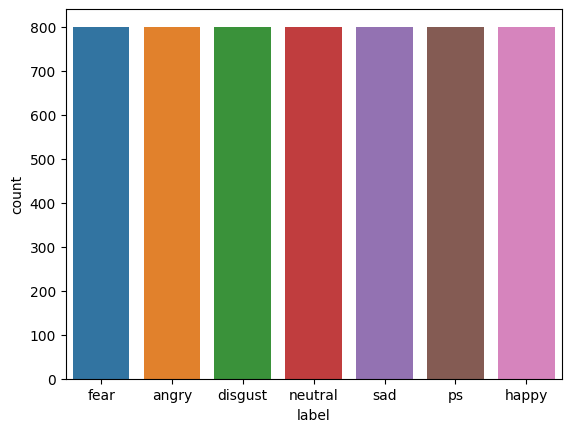

In [8]:
sns.countplot(x='label', data=df)
plt.show()

In [9]:
def wave(data, sr, emotion):
    plt.figure(figsize = (10,4))
    plt.title(emotion, size = 20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectra(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize = (12,4))
    plt.title(emotion, size = 20)
    librosa.display.specshow(xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
    plt.colorbar()

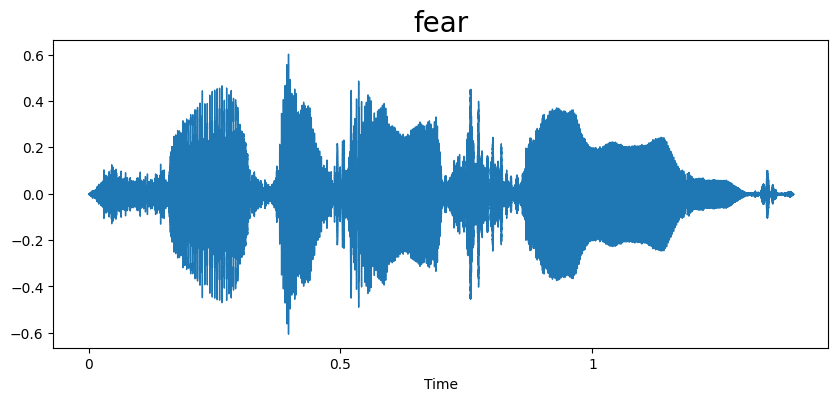

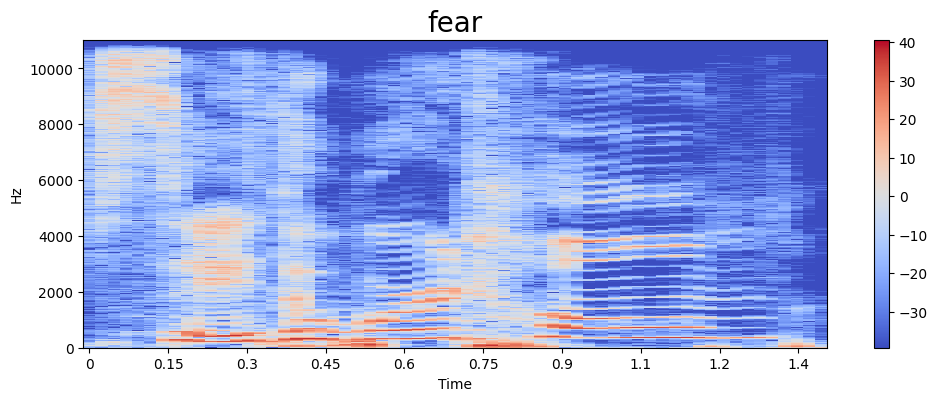

In [10]:
emotion = 'fear'
path = df['Speech'][df['label']==emotion].iloc[0]
data, sampling_rate = librosa.load(path)
wave(data, sampling_rate, emotion)
spectra(data,sampling_rate, emotion)

In [11]:
display(Audio(path))

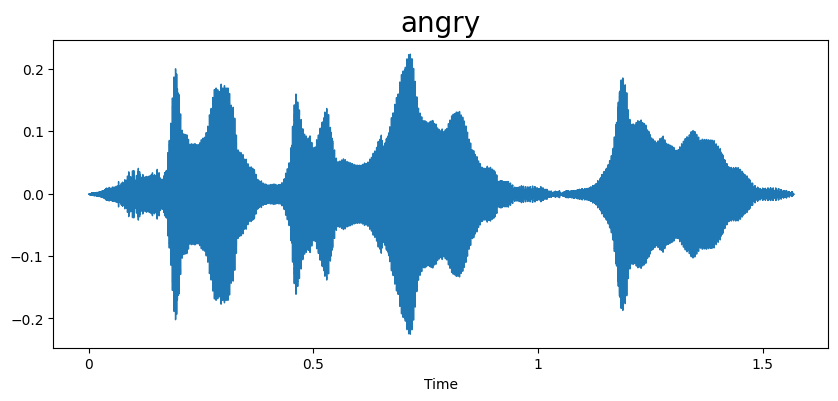

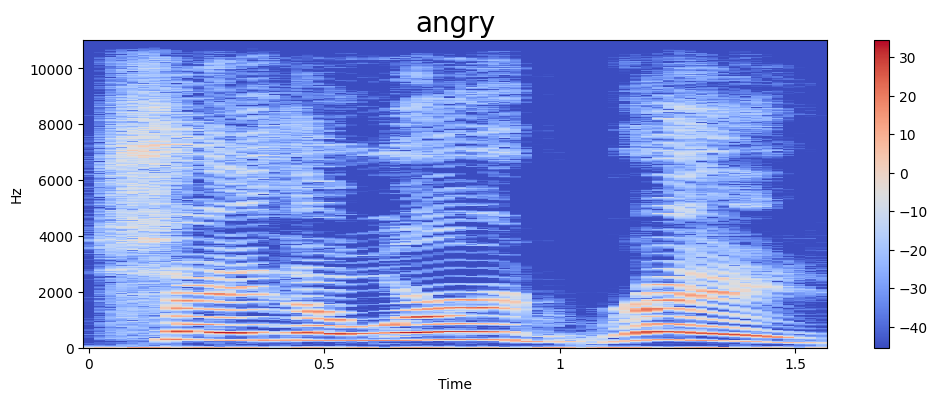

In [12]:
emotion = 'angry'
path = df['Speech'][df['label']==emotion].iloc[0]
data, sampling_rate = librosa.load(path)
wave(data, sampling_rate, emotion)
spectra(data,sampling_rate, emotion)

In [13]:
display(Audio(path))

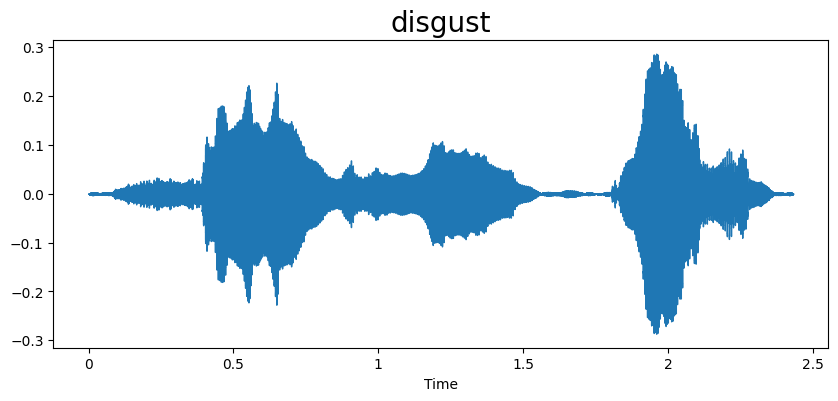

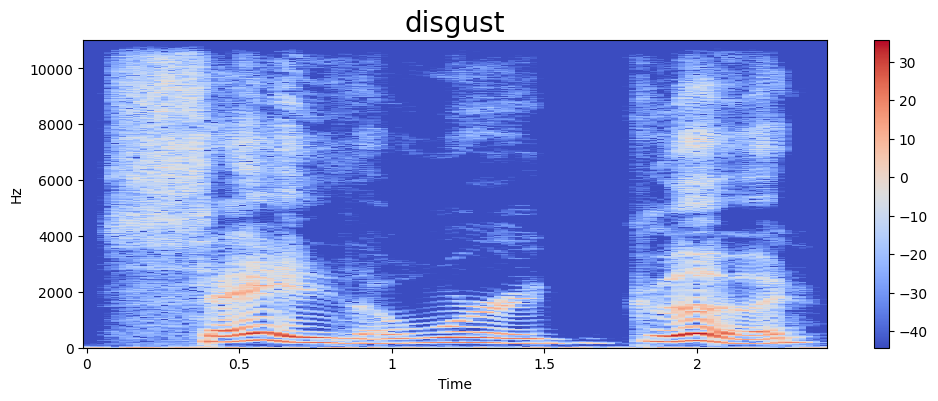

In [14]:
emotion = 'disgust'
path = df['Speech'][df['label']==emotion].iloc[0]
data, sampling_rate = librosa.load(path)
wave(data, sampling_rate, emotion)
spectra(data,sampling_rate, emotion)

In [15]:
display(Audio(path))

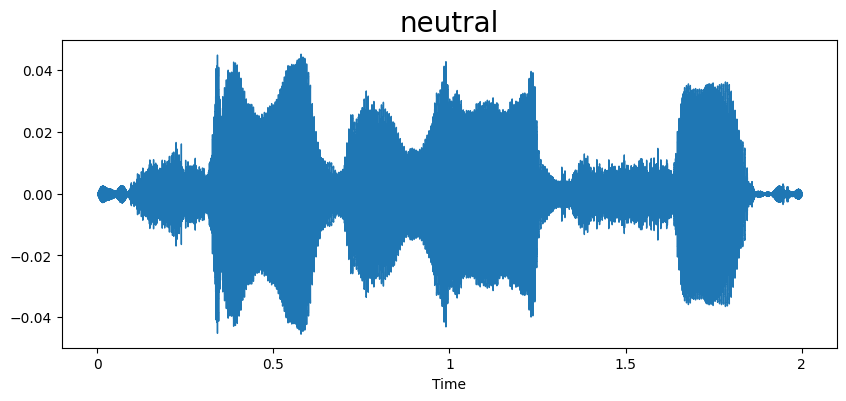

In [ ]:
emotion = 'neutral'
path = df['Speech'][df['label']==emotion].iloc[0]
data, sampling_rate = librosa.load(path)
wave(data, sampling_rate, emotion)
spectra(data,sampling_rate, emotion)

In [20]:
display(Audio(path))

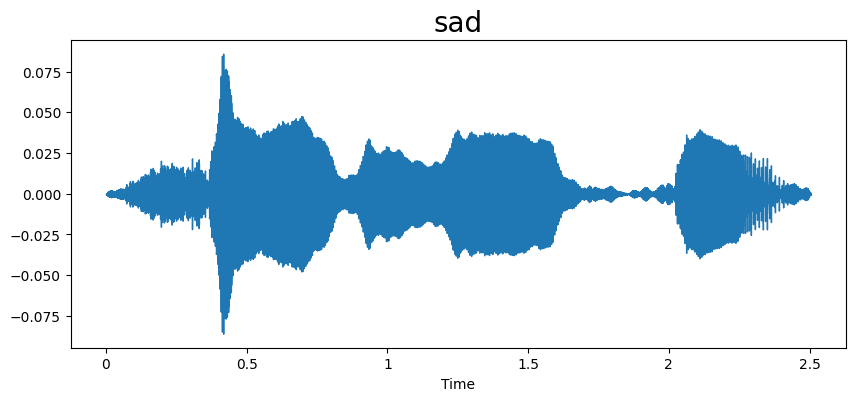

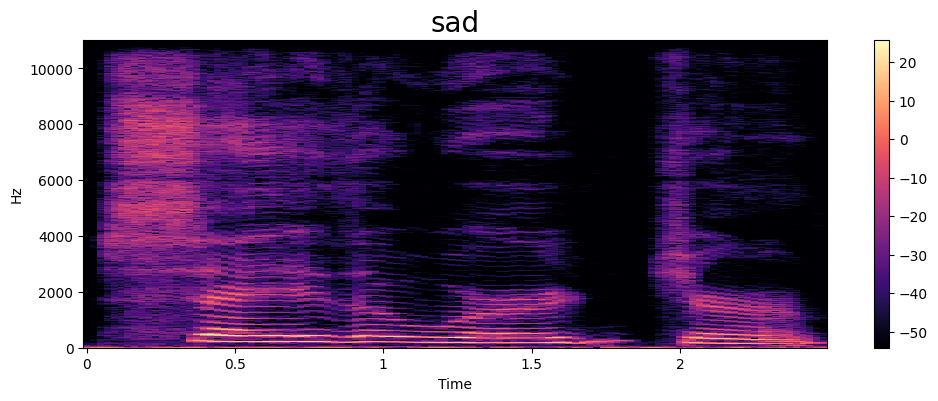

In [21]:
emotion = 'sad'
path = df['Speech'][df['label']==emotion].iloc[0]
data, sampling_rate = librosa.load(path)
wave(data, sampling_rate, emotion)
spectra(data,sampling_rate, emotion)

In [22]:
display(Audio(path))

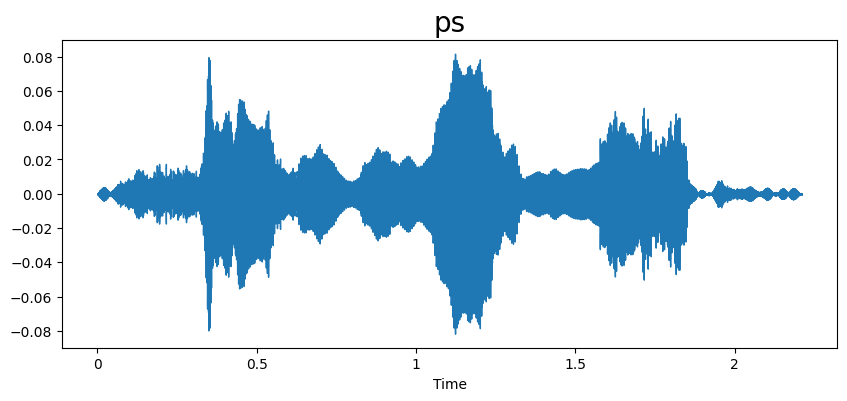

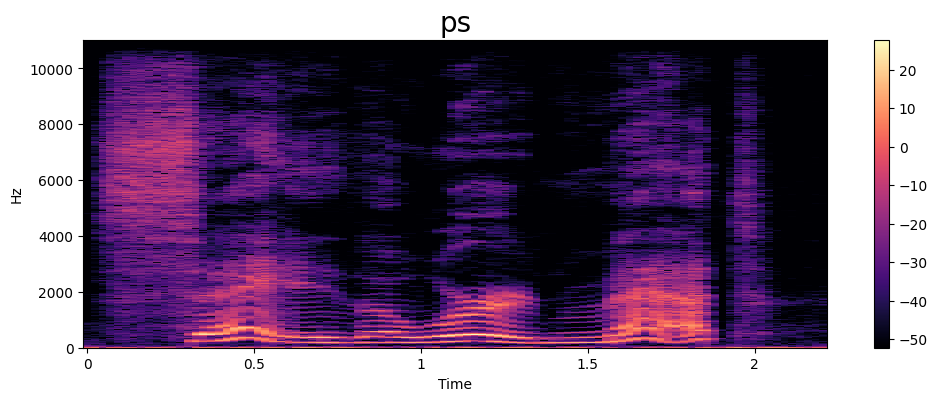

In [23]:
emotion = 'ps'
path = df['Speech'][df['label']==emotion].iloc[0]
data, sampling_rate = librosa.load(path)
wave(data, sampling_rate, emotion)
spectra(data,sampling_rate, emotion)

In [24]:
display(Audio(path))

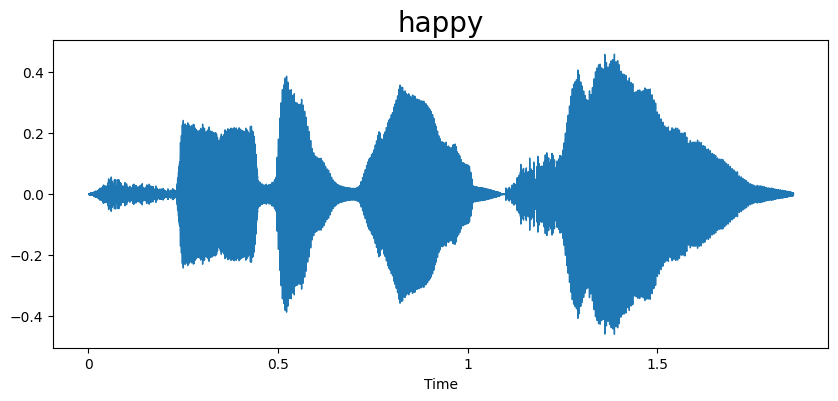

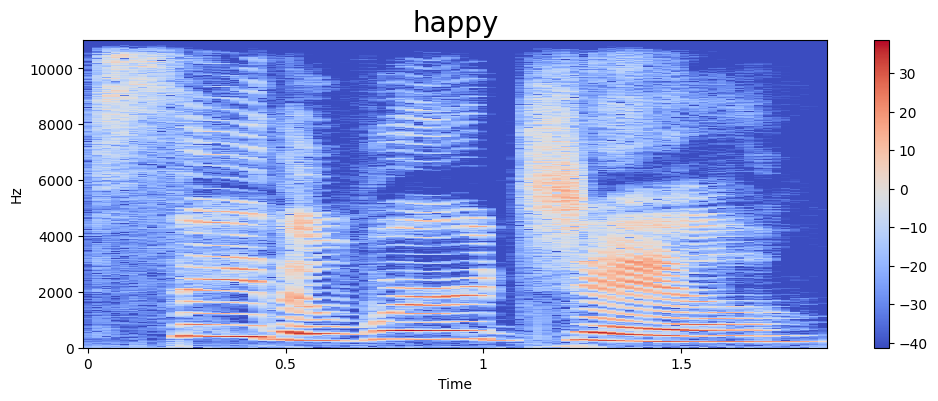

In [25]:
emotion = 'happy'
path = df['Speech'][df['label']==emotion].iloc[0]
data, sampling_rate = librosa.load(path)
wave(data, sampling_rate, emotion)
spectra(data,sampling_rate, emotion)

In [26]:
display(Audio(path))

In [27]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [28]:
extract_mfcc(df['Speech'][0])

array([-285.73727  ,   85.78295  ,   -2.1689117,   22.125532 ,
        -14.757396 ,   11.051347 ,   12.412449 ,   -3.000262 ,
          1.0844985,   11.078271 ,  -17.41966  ,   -8.093213 ,
          6.5879736,   -4.2209525,   -9.15508  ,    3.5214796,
        -13.186381 ,   14.078853 ,   19.66973  ,   22.725618 ,
         32.57464  ,   16.325033 ,   -3.8427284,    0.8962967,
        -11.239264 ,    6.653461 ,   -2.5883694,   -7.7140164,
        -10.941657 ,   -2.4007552,   -5.2812862,    4.271157 ,
        -11.202216 ,   -9.024621 ,   -3.666985 ,    4.8697433,
         -1.6027987,    2.5600514,   11.454374 ,   11.233449 ],
      dtype=float32)

In [29]:
x_mfcc = df['Speech'].apply(lambda x: extract_mfcc(x))

In [30]:
x_mfcc

0       [-285.73727, 85.78295, -2.1689117, 22.125532, ...
1       [-348.34332, 35.193233, -3.8413284, 14.658875,...
2       [-340.11435, 53.796444, -14.267782, 20.884031,...
3       [-306.63422, 21.259708, -4.4110823, 6.4871554,...
4       [-344.7548, 46.329193, -24.171413, 19.392921, ...
                              ...                        
5595    [-374.3952, 60.864998, 0.02505877, 8.431058, -...
5596    [-313.96478, 39.847843, -5.6493053, -3.8675754...
5597    [-357.54886, 77.88605, -15.224756, 2.194633, -...
5598    [-353.1474, 101.68391, -14.175897, -12.037376,...
5599    [-389.4595, 54.042767, 1.3469982, -1.4258989, ...
Name: Speech, Length: 5600, dtype: object

In [31]:
X = [x for x in x_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [32]:
x = np.expand_dims(X, -1)
x.shape

(5600, 40, 1)

In [33]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [34]:
y.toarray()

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [35]:
y = y.toarray()

In [36]:
y.shape

(5600, 7)

In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

2024-06-06 11:29:34.626838: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-06 11:29:34.626972: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-06 11:29:34.771943: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [38]:
model = Sequential([
    LSTM(123, return_sequences=False, input_shape = (40, 1)),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(7, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 123)            │        61,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history = model.fit(X, y, validation_split = 0.2, epochs = 100, batch_size = 512, shuffle = True)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 242ms/step - accuracy: 0.2871 - loss: 1.8541 - val_accuracy: 0.1036 - val_loss: 1.9911
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.5025 - loss: 1.4843 - val_accuracy: 0.1071 - val_loss: 2.0159
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - accuracy: 0.6219 - loss: 1.1077 - val_accuracy: 0.1875 - val_loss: 1.7371
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - accuracy: 0.6765 - loss: 0.9007 - val_accuracy: 0.2830 - val_loss: 1.4330
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - accuracy: 0.7238 - loss: 0.7556 - val_accuracy: 0.4205 - val_loss: 1.3190
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.7846 - loss: 0.5956 - val_accuracy: 0.5902 - val_loss: 0.9725
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.8474 - loss: 0.4449 - val_accuracy: 0.7563 - val_loss: 0.6541
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.8726 - loss: 0.3695 - val_accuracy: 0.7571 - v

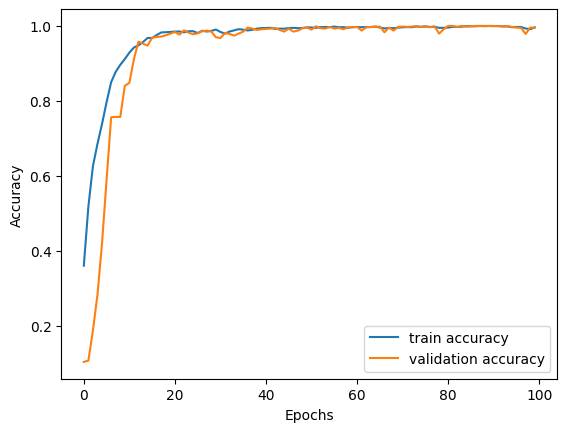

In [40]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label = 'train accuracy')
plt.plot(epochs, val_acc, label = 'validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

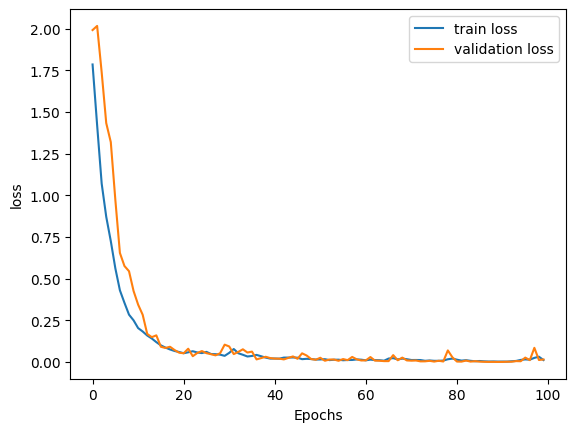

In [41]:
epochs = list(range(100))
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label = 'train loss')
plt.plot(epochs, val_loss, label = 'validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [42]:
model.save('/kaggle/working/emotion_detection_by_speech.h5')
df.to_csv('/kaggle/working/toronto-emotional-speech-set-tess.csv', index=False)

In [44]:
from keras.models import load_model
# Load the model from the saved file
model_path = '/kaggle/working/emotion_detection_by_speech.h5'
model = load_model(model_path)

# Load the DataFrame to recreate the encoder
df = pd.read_csv('/kaggle/working/toronto-emotional-speech-set-tess.csv')
enc = OneHotEncoder()
enc.fit(df[['label']])


OneHotEncoder()

In [45]:
def extract_mfcc(filename, duration=3, offset=0.5):
    y, sr = librosa.load(filename, duration=duration, offset=offset)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [55]:
# Example audio file path (make sure to upload your audio file to Kaggle)
input = '/kaggle/input/check-test/udas.wav'  # Replace with the path to your uploaded audio file

# Extract MFCC features from the new audio file
mfcc = extract_mfcc(input)
X_new = np.expand_dims(mfcc, axis=0)
X_new = np.expand_dims(X_new, axis=-1)

# Predict the emotion
predictions = model.predict(X_new)
predicted_label = np.argmax(predictions, axis=1)

# Get the label names
predicted_emotion = enc.inverse_transform(predictions)
print(f'The predicted emotion is: {predicted_emotion[0][0]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
The predicted emotion is: disgust
